In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LPTic import LPTic

## Obtain a linear power spectrum through e.g. Eisenstein-Hu, CAMB, Class

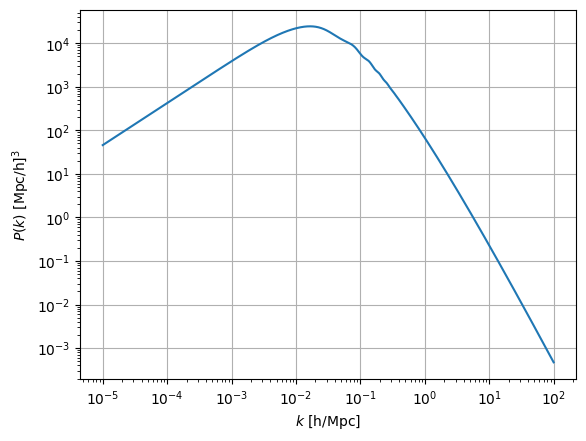

In [2]:
kLin, PLin = np.load("PLin_Planck15.npy")

plt.loglog(kLin,PLin)
plt.xlabel("$k$ [h/Mpc]")
plt.ylabel("$P(k)$ [Mpc/h]$^3$")
plt.grid()
plt.show()

## Generate LPT initial conditions

In [3]:
help(LPTic)

Help on function LPTic in module LPTic:

LPTic(grid, BoxSize, z, Omega_m, kLin, PLin, n_LPT=2, seed=0)
    Generate initial conditions for cosmological simulations using Lagrangian Perturbation Theory (LPT).
    
    Parameters
    ----------
    grid : int
        The number of grid points along each axis (grid resolution).
    BoxSize : float
        The physical size of the simulation box (in units of Mpc/h).
    z : float
        The redshift at which to generate the initial conditions.
    Omega_m : float
        Matter density parameter at redshift zero (Ωₘ₀).
    kLin : array_like
        1D array of wave numbers (in units of Mpc/h) corresponding to the linear power spectrum at redshift zero.
    PLin : array_like
        1D array of linear power spectrum values (in units of (Mpc/h)^3) corresponding to kLin.
    n_LPT : int
        Order of LPT to use (must be either 1 (Zeldovich/1LPT) or 2 (2LPT))
    seed : int, optional
        Seed for the random number generator.
    
    R

In [4]:
grid = 128
BoxSize = 1000.
redshift = 0.

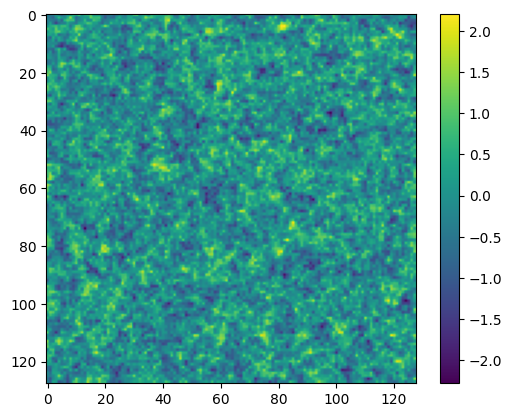

In [5]:
linear_density, particle_pos_1LPT = LPTic(grid=grid, BoxSize=BoxSize, z=redshift, Omega_m=0.3075, kLin=kLin, PLin=PLin, n_LPT=1, seed=9)
linear_density, particle_pos_2LPT = LPTic(grid=grid, BoxSize=BoxSize, z=redshift, Omega_m=0.3075, kLin=kLin, PLin=PLin, n_LPT=2, seed=9)

plt.imshow(linear_density[:8].mean(0))
plt.colorbar()
plt.show()

## Assign particles to grid using e.g. Pylians, or use as input to a simulation

In [6]:
import MAS_library as MASL

MAS = 'CIC'

delta_1LPT = np.zeros((grid,grid,grid), dtype=np.float32)
delta_2LPT = np.zeros((grid,grid,grid), dtype=np.float32)

MASL.MA(particle_pos_1LPT, delta_1LPT, BoxSize, MAS, verbose=True)
MASL.MA(particle_pos_2LPT, delta_2LPT, BoxSize, MAS, verbose=True)

delta_1LPT /= np.mean(delta_1LPT, dtype=np.float64);  delta_1LPT -= 1.0
delta_2LPT /= np.mean(delta_2LPT, dtype=np.float64);  delta_2LPT -= 1.0


Using CIC mass assignment scheme
Time taken = 0.027 seconds


Using CIC mass assignment scheme
Time taken = 0.027 seconds



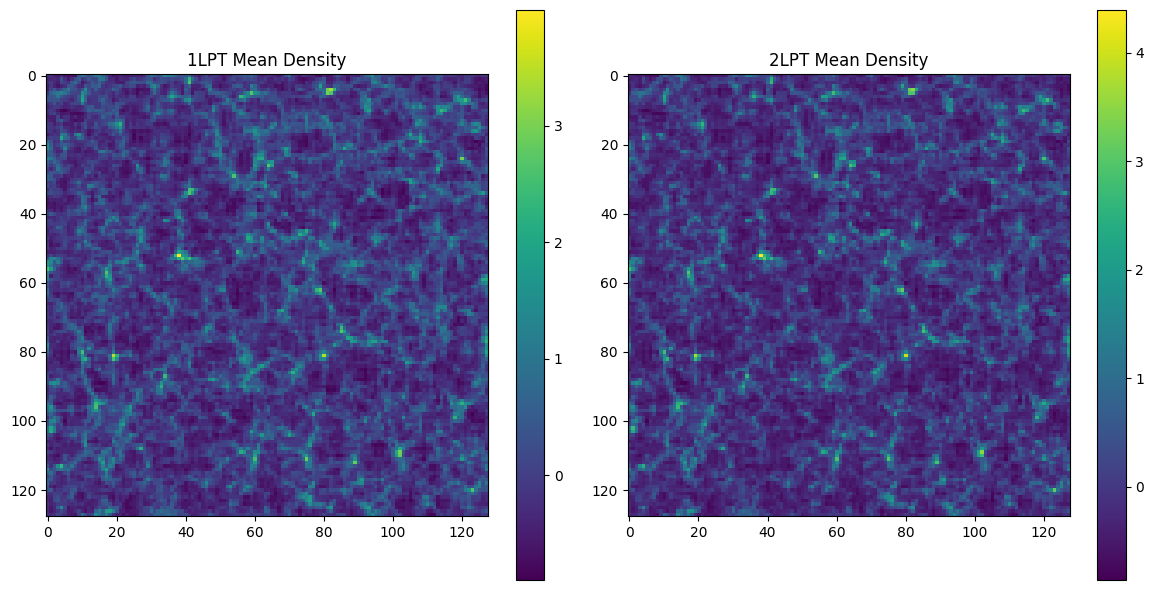

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1-row, 2-column subplot

# Plot the 1LPT field
im1 = axes[0].imshow(delta_1LPT[:8].mean(0))
axes[0].set_title("1LPT Mean Density")
plt.colorbar(im1, ax=axes[0])

# Plot the 2LPT field
im2 = axes[1].imshow(delta_2LPT[:8].mean(0))
axes[1].set_title("2LPT Mean Density")
plt.colorbar(im2, ax=axes[1])

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

## Compute powerspectrum using e.g. Pylians

In [8]:
import Pk_library as PKL

Pk_1LPT = PKL.Pk(delta_1LPT, BoxSize, MAS=MAS)
Pk_2LPT = PKL.Pk(delta_2LPT, BoxSize, MAS=MAS)


Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.07 seconds

Computing power spectrum of the field...
Time to complete loop = 0.06
Time taken = 0.07 seconds


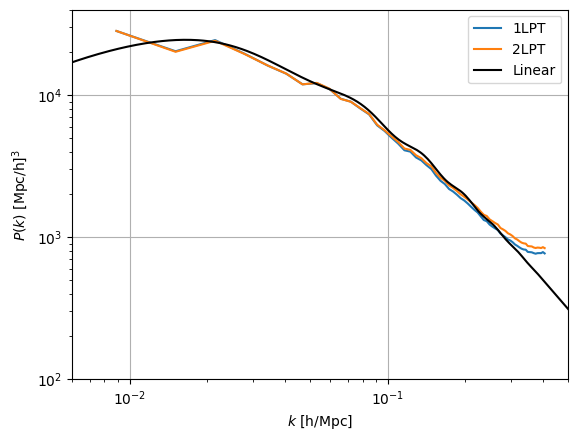

In [9]:
plt.loglog(Pk_1LPT.k3D[:grid//2], Pk_1LPT.Pk[:grid//2,0],label="1LPT")
plt.loglog(Pk_2LPT.k3D[:grid//2], Pk_2LPT.Pk[:grid//2,0],label="2LPT")
plt.loglog(kLin, PLin,"k",label="Linear")
plt.xlim(6e-3, 0.5)
plt.ylim(1e2,4e4)
plt.xlabel("$k$ [h/Mpc]")
plt.ylabel("$P(k)$ [Mpc/h]$^3$")
plt.legend()
plt.grid()
plt.show()